In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Thermal optimal path

## Synthetic examples

We reproduce some of the results from [Non-parametric Determination of Real-Time Lag Structure between Two Time Series: the “Optimal Thermal Causal Path” Method, D.Sornette and  W.-X. Zhou (2004)](https://arxiv.org/abs/cond-mat/0408166).

In [2]:
def standardise(ts):
    ts -= np.mean(ts)
    return ts / np.std(ts)

In [3]:
np.random.seed(1)

error_x = 0.1
error_y = error_x / 5
x = np.zeros(300)
y = np.zeros(300)

for i in range(1, 300):
    x[i] = 0.7 * x[i-1] + error_x * np.random.randn(1)
    
for i in range(10, 100):
    y[i] = x[i-10] + error_y * np.random.randn(1)
    
for i in range(100, 200):
    y[i] = -x[i-5] + error_y * np.random.randn(1)
    
for i in range(200, 300-5):
    y[i] = x[i+5] + error_y * np.random.randn(1)
    
x = standardise(x)
y = standardise(y)

/tmp/ipykernel_16250/791202552.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = 0.7 * x[i-1] + error_x * np.random.randn(1)
/tmp/ipykernel_16250/791202552.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = x[i-10] + error_y * np.random.randn(1)
/tmp/ipykernel_16250/791202552.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = -x[i-5] + error_y * np.random.randn(1)
/tmp/ipykernel_16250/791202552.py:18: DeprecationWarning: Conversion of an 

In [4]:
x

array([-2.04519038e-01,  1.15304671e+00,  2.34494365e-01, -3.38635411e-01,
       -1.19514665e+00, -1.74683758e-01, -2.10717238e+00, -7.81294217e-02,
       -7.52233928e-01, -3.21278784e-01, -4.94665085e-01,  8.14352637e-01,
       -1.21309570e+00, -1.17998667e+00, -1.20832433e+00,  4.03784091e-02,
       -9.52337890e-01, -8.72101137e-01, -1.40550701e+00, -1.00992998e+00,
       -2.81212027e-01, -1.17805955e+00,  7.07189065e-02,  7.41662574e-01,
        8.77773645e-01,  1.30598680e+00,  2.81401445e-01,  3.29183486e-02,
       -8.20393180e-01, -8.59521551e-01, -2.19769977e-01, -7.93258305e-01,
       -9.48227952e-01, -1.29942795e+00, -1.67734583e+00, -1.79649964e+00,
       -1.32949005e+00, -1.92580401e+00, -1.21350284e+00,  4.76391493e-01,
        8.92290469e-01,  4.02918798e-01, -5.21158901e-01, -1.05061328e+00,
        6.17703838e-01,  4.13500154e-01, -3.04282209e-01, -1.14793395e-01,
        1.61360185e+00,  1.16858984e+00,  1.27249194e+00,  1.08025952e+00,
        4.00429000e-01, -

In [5]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)

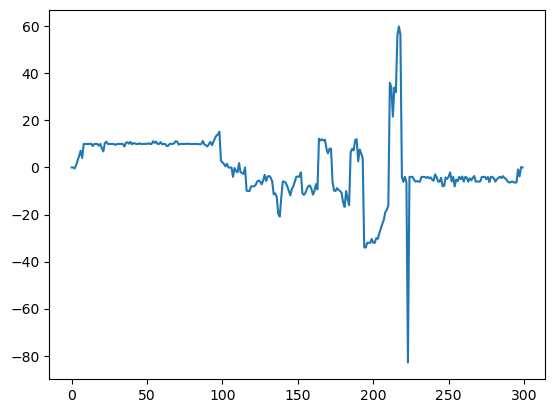

In [6]:
from thermal_optimal_path.lattice import partition_function
from thermal_optimal_path.statistics import average_path

temperature = 0.1
g = partition_function(x, y, temperature)
avg = average_path(g)
plt.plot(avg[::2])

In [7]:
print(len(g[0]))

300


In [8]:
g

array([[1.00000000e+000, 1.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 1.85672677e-005, 6.18920416e-006, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 7.32188171e-001, 5.36107690e-001, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        6.13407941e-252, 2.86320961e-252, 1.33648273e-252],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        8.30122380e-252, 3.96166321e-252, 1.86909374e-252],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        8.01144984e-253, 3.22115663e-253, 1.51709414e-253]])

In [9]:
print(avg)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -9.99983094e-01
 -4.41614270e-01  1.42383982e-01  1.06203149e+00  2.04127266e+00
  3.03553544e+00  4.03391983e+00  5.03346192e+00  6.03333146e+00
  7.15944955e+00  6.99996791e+00  4.01504532e+00  5.00002247e+00
  1.00000000e+01  1.09356327e+01  1.00011071e+01  9.00345722e+00
  1.00003111e+01  1.10092544e+01  1.00008056e+01  1.29999600e+01
  1.00002623e+01  1.09983895e+01  1.00884509e+01  9.22785042e+00
  9.11318095e+00  1.07303408e+01  9.99680078e+00  9.00018401e+00
  9.99998067e+00  7.26061885e+00  1.00000000e+01  9.25785724e+00
  9.27034605e+00  1.05778696e+01  9.99507789e+00  6.95041675e+00
  8.22772926e+00  7.03906304e+00  6.80864538e+00  5.61806472e+00
  1.02865924e+01  1.13264921e+01  1.09925425e+01  9.46983516e+00
  1.00201624e+01  9.22632531e+00  9.97448490e+00  1.09893997e+01
  9.97692456e+00  8.71209918e+00  9.99999994e+00  9.00121360e+00
  9.99629128e+00  9.71493932e+00  9.56959059e+00  9.00126667e+00
  9.98066558e+00  1.10010

## Running time measurements

We motivate the Numba implementation provided by comparing it to running the same Python code in the original interpreter. Running time is reduced by a factor of ~1000.

In [10]:
%%timeit
g = partition_function(x, y, 0.1)

2.12 ms ± 136 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
from thermal_optimal_path.error_models import error
from thermal_optimal_path.lattice import _partition_function_impl

In [12]:
%%timeit
g = _partition_function_impl.py_func(x, y, 0.1, error)

3.38 s ± 207 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
